# Calculate covariance

In [47]:
from pathlib import Path
from pickle import dump

import covseisnet as csn

## Read seismograms

<Axes: ylabel='Normalized amplitude'>

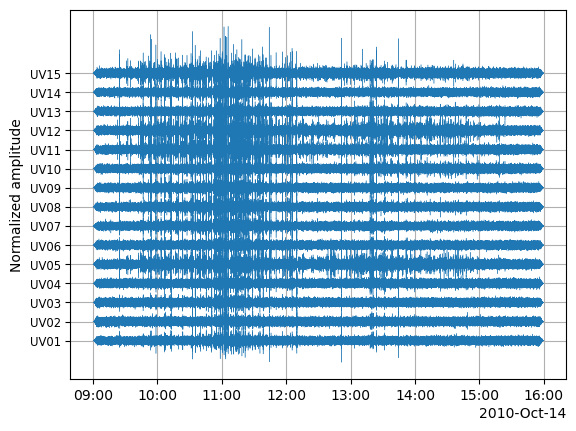

In [39]:
# Read
stream = csn.read("data/undervolc.mseed")

# Pre-process
stream.normalize(global_max=True)
stream.filter("highpass", freq=0.5)
stream.time_normalize(method="smooth", smooth_length=1001)
stream.taper(max_percentage=0.01)

# Plot stream
csn.plot.plot_stream(stream, trace_factor=0.1, lw=0.3)

## Calculate covariance matrix

In [49]:
# Calculate covariance matrix
times, frequencies, covariances = csn.calculate_covariance_matrix(
    stream, window_duration=20, average=20, whiten="slice"
)

# Save
filepath_covariance = Path("data/undervolc_covariance.pickle")
with open(filepath_covariance, "wb") as file:
    dump(covariances, file)

array([<Axes: title={'center': 'Covariance matrix'}, xlabel='Channel $i$', ylabel='Channel $j$'>,
       <Axes: title={'center': 'Eigenspectrum'}, xlabel='Eigenvalue index ($n$)', ylabel='Eigenvalue ($\\lambda_n$)'>],
      dtype=object)

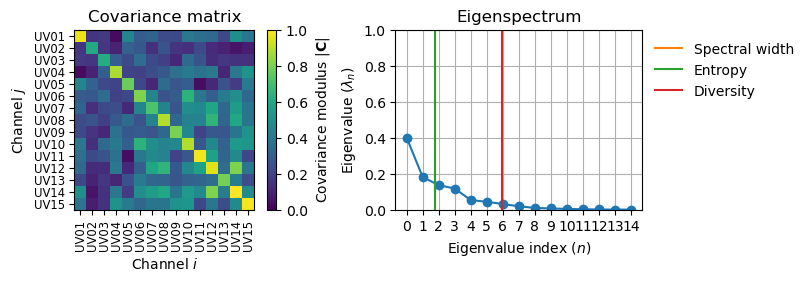

In [41]:
# Show covariance from sample window and frequency
t_index = 60
f_index = 100
csn.plot.covariance_matrix_modulus_and_spectrum(covariances[t_index, f_index])

## Coherence

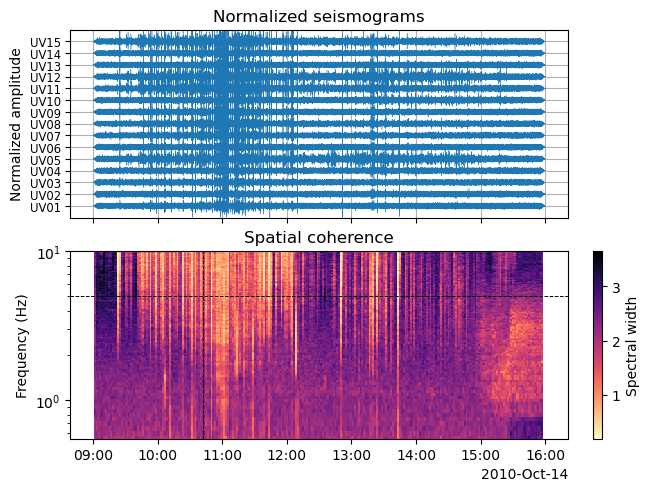

In [46]:
# Calculate coherence
coherence = covariances.coherence(kind="spectral_width")

# Show
ax = csn.plot.stream_and_coherence(
    stream,
    times,
    frequencies,
    coherence,
    f_min=0.5,
)

# Mark extracted time and frequency
ax[1].axvline(times[t_index], color="k", linestyle="--", lw=0.7)
ax[1].axhline(frequencies[f_index], color="k", linestyle="--", lw=0.7)